# Titanic_dataset

#### Titanic Dataset Features
#### #Passenger ID to identify the passenger, numerical feature (Passenger ID/Ticket Number).
#### #Survived is our label, as we can see is a binary feature, 1 if survived and 0 otherwise.
#### #Pclass is the Ticket class (1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (lower))
#### #Age is the age in years
#### #Sibsp is the number of siblings / spouses aboard the Titanic
#### #Parch is the number of parents / children aboard the Titanic
#### #Ticket is the ticket number
#### Fare is the Passenger fare
#### #Cabin is the cabin number
#### #Cabin is the cabin number
#### #Embarked means Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
#1.Cleaning Data
 #Find all null values in dataset and fill with mean of that column
#2.Find out what is min & max age of person present on titanic?
#3.Find out how many people survived?
#4.Find percentage of people survived?
#5.Find how many people are Male
#6.Find out how many people traveling with 1 class
#7.Find out how many people from survived from 1 class
#8.Find out age of survived people
#9.Find out people sex that survived
#10.Find out how many peoples come with there Siblings/Spouse
#11.Find out how many peoples come with there Parents or Childrens?
#12.Find how many males are there which travelling with 1 class and sirvived

### Step 1:- Import required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2:- Import given dataset

In [3]:
df = pd.read_csv("titanic_dataset.csv")

### Step 3:- Inspecting Data Set

In [4]:
#To check diamentions of data set
df.shape

(891, 12)

In [5]:
#To view first 2 rows of dataset
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
#To view columns name of data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#To view Index, Datatypes & memory storage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#To view statistics of data set
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Step 4:- Data Cleaning

### 1.Check dataset contain any null value 

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Here Cabin column have more null values to fill these with new Cabin X
df['Cabin'].fillna('X', inplace = True)

In [11]:
#Here second largest column is Age contaning more null values that fill with mean value of that column
df['Age'].fillna(df['Age'].mean(), inplace =True)

In [12]:
#Here 3rd largest column is Embarked containing ony 2 missing values that fill with S most frequently use 
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df['Embarked'].fillna('S', inplace =True)

In [14]:
#Again check any null value present in any column
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 2.Check any duplicate value present in dataset

In [15]:
df.duplicated().sum()

0

### 3.Find out what is min & max age of person present on titanic

In [16]:
df['Age'].min(), df['Age'].max()

(0.42, 80.0)

### 4.Find out how many people survived

In [17]:
 df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

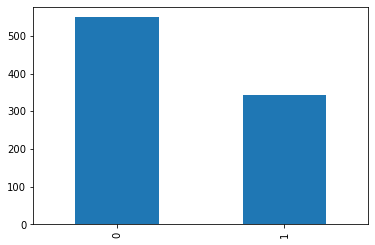

In [18]:
df['Survived'].value_counts().plot(kind='bar')

### 5.Find percentage of people survived

In [19]:
df['Survived'].value_counts()*100/ len(df)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

### 6.Find how many people are Male

In [20]:
 df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:>

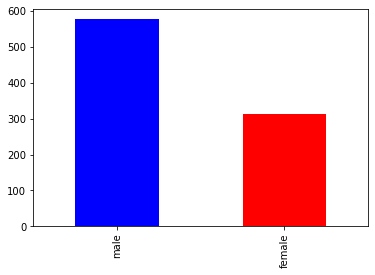

In [21]:
df['Sex'].value_counts().plot(kind='bar', color =['b','r'])

### 7.Find out how many people traveling with 1 class

In [22]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

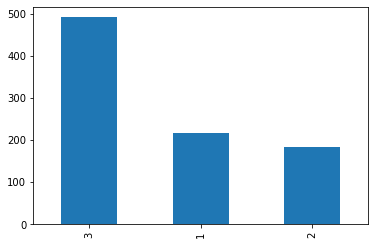

In [23]:
df['Pclass'].value_counts().plot(kind='bar')

### 8.Find out how many people from survived from 1 class

In [24]:
df.groupby('Survived').Pclass.value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Survived,Pclass'>

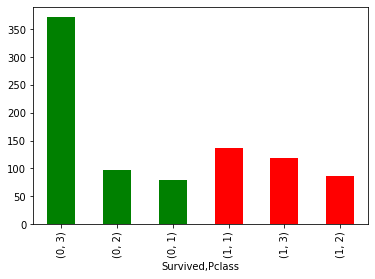

In [25]:
df.groupby('Survived').Pclass.value_counts().plot(kind = 'bar', color =['g','g','g','r','r','r'])

### 9.Find out age of survived people

In [26]:
df.groupby('Survived').Age.value_counts()

Survived  Age      
0         29.699118    125
          21.000000     19
          28.000000     18
          18.000000     17
          25.000000     17
                      ... 
1         43.000000      1
          47.000000      1
          53.000000      1
          55.000000      1
          80.000000      1
Name: Age, Length: 144, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='Age'>

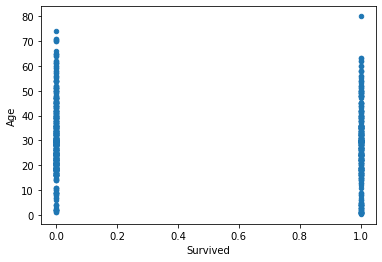

In [27]:
df.plot(kind = 'scatter', x ='Survived', y = 'Age')

### 10.Find out people sex that survived

In [28]:
df.groupby('Survived').Sex.value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Survived,Sex'>

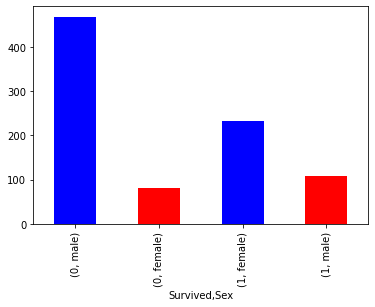

In [29]:
df.groupby('Survived').Sex.value_counts().plot(kind='bar', color=['b','r'])

### 11.Find out how many peoples come with there Siblings/Spouse

In [30]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

### 12.Find out how many peoples come with there Parents or Childrens

In [31]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### 13.Find how many males are there which travelling with 1 class and sirvived

In [32]:
df[(df['Sex']=='male') & (df['Pclass']==1)]['Survived'].value_counts()

0    77
1    45
Name: Survived, dtype: int64

### 14.How many people enter from Southampton

In [33]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S
